**Упражнение 2.2: Исследование пилообразного сигнала и его спектральных особенностей**

В данном упражнении был создан и проанализирован пилообразный сигнал. Для генерации была задана основная частота 950 и частота дискретизации 8000. Была отображена форма сигнала во временной области.
При построении спектра особое внимание было уделено явлению алиасинга ("обертыванию" гармоник), которое возникает, когда частота дискретизации недостаточно высока по сравнению с частотами компонент сигнала. Для контекста и сравнения гармонического состава были также исследованы спектры других стандартных сигналов, такого как треугольный, с аналогичными параметрами. Анализировались различия в структуре их гармоник по сравнению с пилообразным сигналом.

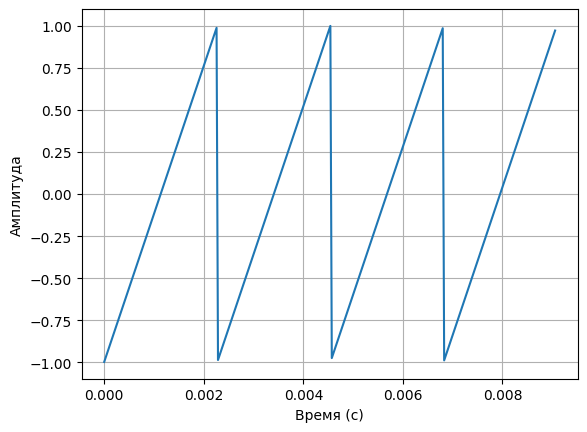

In [33]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Sinusoid, normalize, unbias, plt, TriangleSignal, SquareSignal, SinSignal, SawtoothSignal, CosSignal, ParabolicSignal
import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

sample_signal = SawtoothSignal()
test_wave = sample_signal.make_wave(sample_signal.period * 4, framerate=35000)
test_wave.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

saw_audio = SawtoothSignal().make_wave(duration=0.5, framerate=35000)
saw_audio.make_audio()

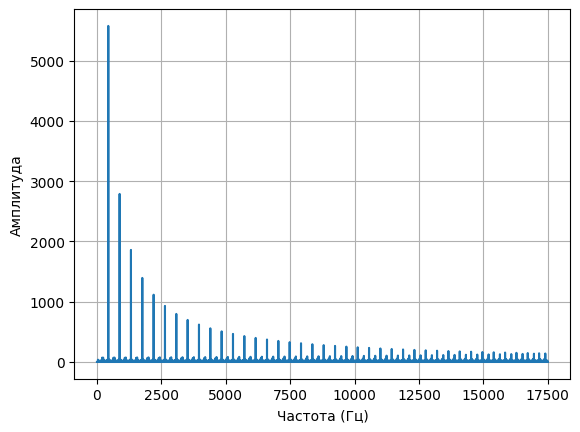

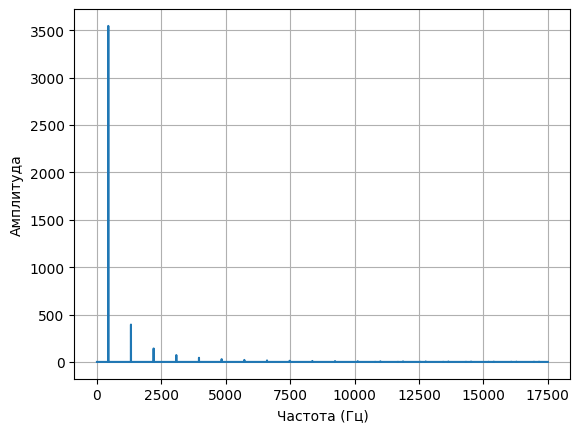

In [34]:
freq_analysis = saw_audio.make_spectrum()
freq_analysis.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

triangle_audio = TriangleSignal(amp=0.5).make_wave(duration=0.5, framerate=35000)
freq_analysis_triangle = triangle_audio.make_spectrum()
freq_analysis_triangle.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()
triangle_audio.make_audio()

**Упражнение 2.3: Демонстрация алиасинга на примере прямоугольного сигнала**

Это упражнение фокусировалось на практической демонстрации эффекта алиасинга. Был сгенерирован прямоугольный сигнал с частотой 1300 Гц и выбранной частотой дискретизации 9000 Гц. Проанализирован спектр этого сигнала на предмет наличия "завернутых" гармоник, являющихся следствием дискретизации сигнала с частотой, не удовлетворяющей теореме Котельникова для всех его значимых гармоник. Также была предпринята попытка оценить слышимость артефактов алиасинга при воспроизведении сгенерированного аудиосигнала.

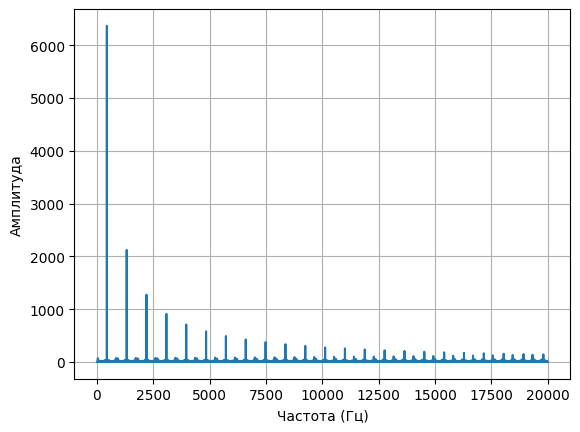

In [35]:
square_audio = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
freq_analysis_square = square_audio.make_spectrum()
freq_analysis_square.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()
square_audio.make_audio()

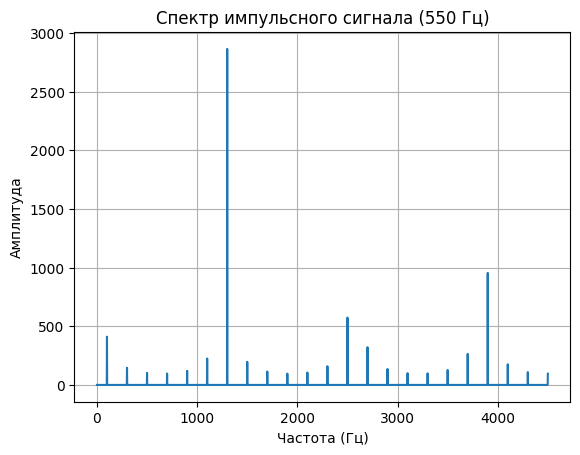

In [36]:
pulse_signal = SquareSignal(freq=1300)
audio_one = pulse_signal.make_wave(duration=0.5, framerate=9000)
spectrum_one = audio_one.make_spectrum()
spectrum_one.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр импульсного сигнала (550 Гц)")
plt.grid(True)
plt.show()
audio_one.make_audio()

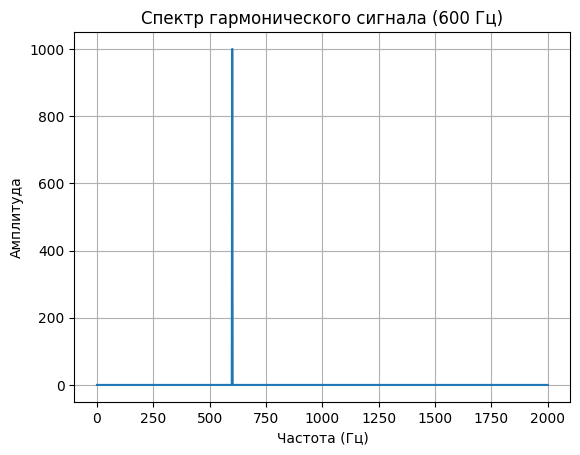

In [37]:
harmonic_signal = SinSignal(freq=600)
audio_two = harmonic_signal.make_wave(duration=0.5, framerate=4000)
spectrum_two = audio_two.make_spectrum()
spectrum_two.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр гармонического сигнала (600 Гц)")
plt.grid(True)
plt.show()
audio_two.make_audio()

**Упражнение 2.4: Анализ и модификация DC-компоненты сигнала**

В этом задании исследовалась компонента с нулевой частотой (DC-составляющая) в спектре сигнала. Был создан треугольный сигнал с основной частотой 330 Гц и небольшой длительностью 0.015 с. Для этого сигнала был рассчитан и визуализирован спектр.
Особое внимание было уделено значению `Spectrum.hs[0]`, представляющему комплексную амплитуду DC-компоненты. Были проанализированы её исходные амплитуда и фаза. Затем значение `Spectrum.hs[0]` было искусственно изменено на [НОВОЕ_ЗНАЧЕНИЕ_DC, например, 75]. После этого из модифицированного спектра был восстановлен сигнал во временной области, и было оценено влияние этого изменения на его форму (ожидалось смещение сигнала по вертикали).

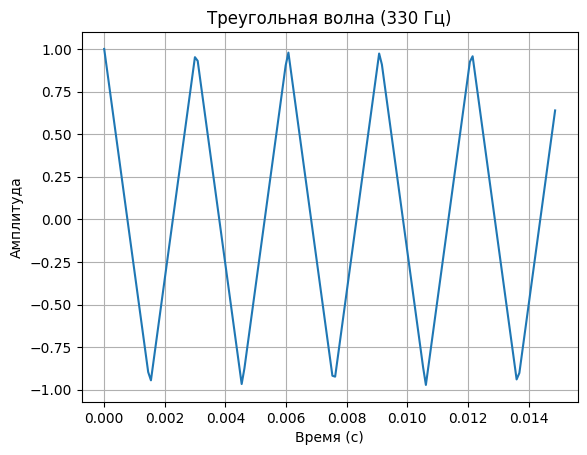

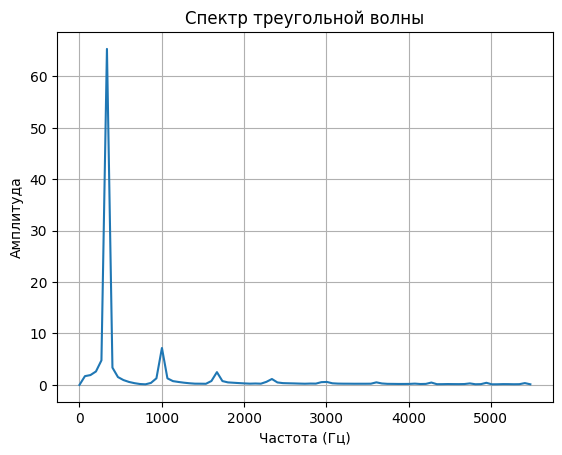

Амплитуда компоненты с частотой 0 Гц: (1.734723475976807e-14+0j)


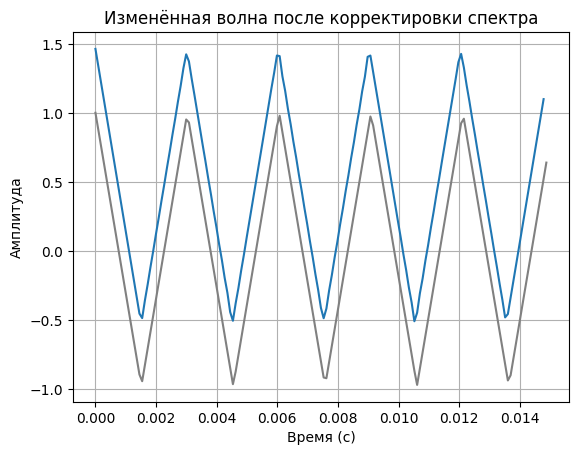

In [38]:
tri_wave = TriangleSignal(freq=330)
signal_wave = tri_wave.make_wave(duration=0.015)
signal_wave.plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Треугольная волна (330 Гц)")
plt.grid(True)
plt.show()
freq_content = signal_wave.make_spectrum()
freq_content.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр треугольной волны")
plt.grid(True)
plt.show()
print("Амплитуда компоненты с частотой 0 Гц:", freq_content.hs[0])
freq_content.hs[0] = 75
signal_wave.plot(color='gray')
new_signal = freq_content.make_wave()
new_signal.plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Изменённая волна после корректировки спектра")
plt.grid(True)
plt.show()

def adjust_spectrum(freq_data):
    active_freqs = freq_data.fs[1:]
    freq_data.hs[1:] /= active_freqs
    freq_data.hs[0] = 0

rect_wave = SquareSignal(440).make_wave(duration=0.5)
rect_wave.make_audio()

**Упражнение 2.5: Фильтрация сигнала путем прямого изменения его спектра**

Целью данного упражнения была разработка и тестирование функции, изменяющей спектральные характеристики сигнала путем деления амплитуд его гармоник на соответствующие им частоты (реализация фильтра с передаточной характеристикой, обратной частоте, 1/f). DC-компонента (`Spectrum.hs[0]`) при этом обнулялась во избежание деления на ноль.
Для проверки работы функции был использован прямоугольный с частотой 250 Гц. Спектр этого сигнала был рассчитан и визуализирован до и после применения разработанной функции модификации. Затем из измененного спектра был восстановлен временной сигнал. Проанализированы изменения как во временной, так и в частотной областях, а также на слух, для понимания эффекта данной операции (например, специфическое ослабление высокочастотных компонент и изменение тембра).

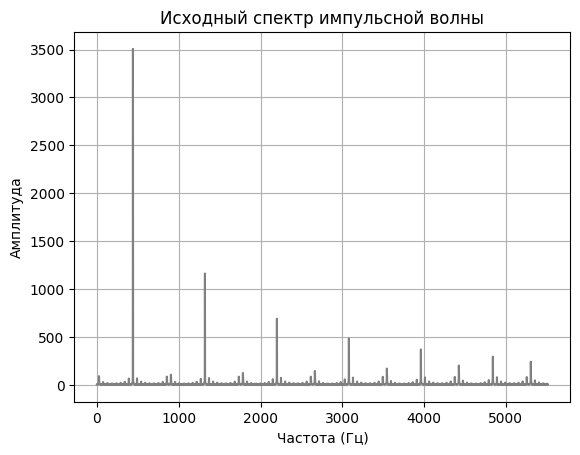

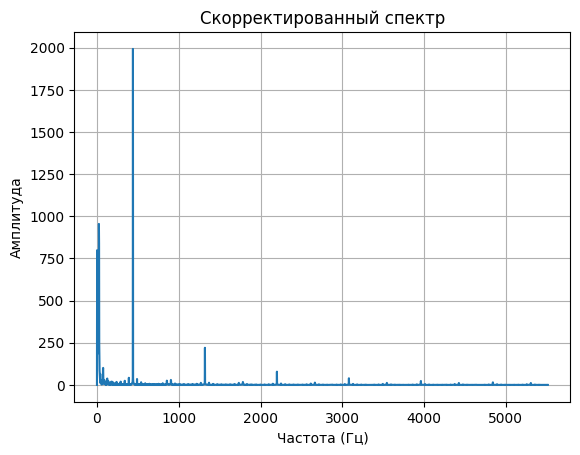

In [39]:
freq_data = rect_wave.make_spectrum()
freq_data.plot(high=10000, color='gray')
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Исходный спектр импульсной волны")
plt.grid(True)
plt.show()
adjust_spectrum(freq_data)
freq_data.scale(250)
freq_data.plot(high=10000)
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Скорректированный спектр")
plt.grid(True)
plt.show()
filtered_audio = freq_data.make_wave()
filtered_audio.make_audio()

**Упражнение 2.6: Формирование сигнала с параболической формой волны (спектр 1/f²)**

В этом упражнении ставилась задача синтезировать сигнал, амплитуды гармоник которого убывают пропорционально квадрату частоты (1/f²), что теоретически должно соответствовать параболической форме волны в пределах одного периода.
Первый подход заключался в модификации спектра существующего сигнала: был взят [ИСХОДНЫЙ_СИГНАЛ, например, пилообразный] с базовой частотой 400 Гц. Его спектр был изменен так, чтобы амплитуды гармоник соответствовали закону 1/f² (DC-компонента обнулена). Были визуализированы исходный и модифицированный спектры, а также временная форма восстановленного сигнала.
Наблюдаемая форма сегментов полученного сигнала анализировалась на предмет соответствия ожидаемой параболической форме.

In [40]:
base_freq = 400
saw_pattern = SawtoothSignal(freq=base_freq)
saw_audio = saw_pattern.make_wave(duration=0.5, framerate=20000)
saw_audio.make_audio()

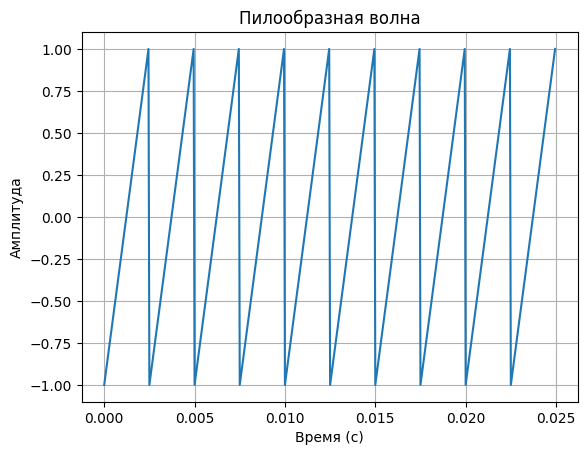

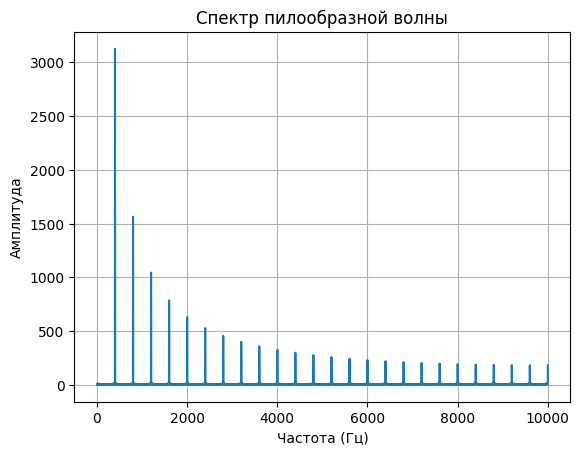

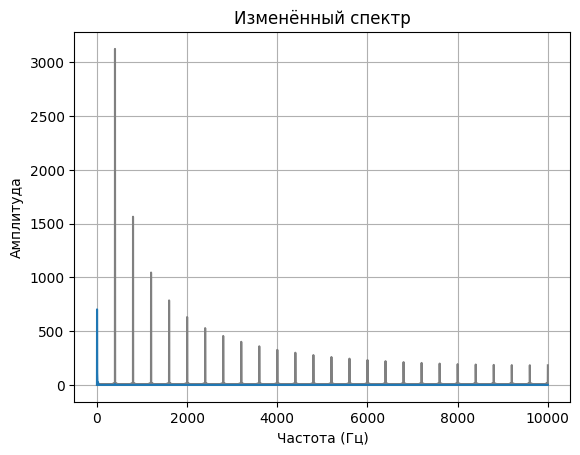

In [41]:
wave_section = saw_pattern.make_wave(duration=saw_pattern.period * 10, framerate=20000)
wave_section.plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Пилообразная волна")
plt.grid(True)
plt.show()
freq_profile = saw_audio.make_spectrum()
freq_profile.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр пилообразной волны")
plt.grid(True)
plt.show()
freq_profile.plot(color='gray')

def adjust_spectrum(freq_data):
    active_freqs = freq_data.fs[1:]  
    freq_data.hs[1:] /= active_freqs ** 2
    freq_data.hs[0] = 0  

adjust_spectrum(freq_profile)
freq_profile.scale(base_freq)
freq_profile.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Изменённый спектр")
plt.grid(True)
plt.show()
modified_audio = freq_profile.make_wave()
modified_audio.make_audio()

In [42]:
harmonic_freqs = np.arange(500, 10500, 500)
harmonic_amps = 1 / harmonic_freqs**2
combined_signal = sum(CosSignal(freq, amp) for freq, amp in zip(harmonic_freqs, harmonic_amps))
combined_audio = combined_signal.make_wave(duration=0.5, framerate=20000)
combined_audio.make_audio()

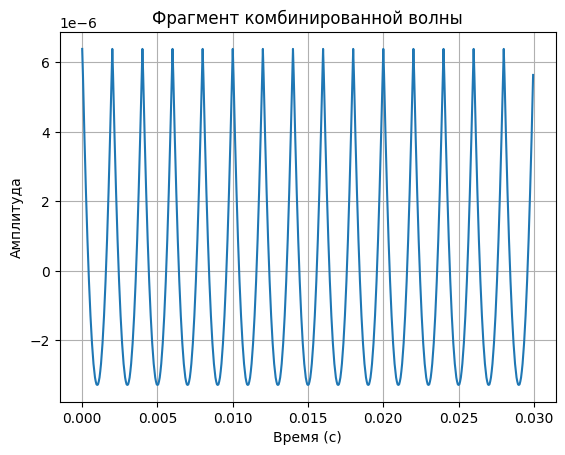

In [43]:
combined_audio.segment(duration=0.03).plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Фрагмент комбинированной волны")
plt.grid(True)
plt.show()

parabolic_audio = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
parabolic_audio.make_audio()

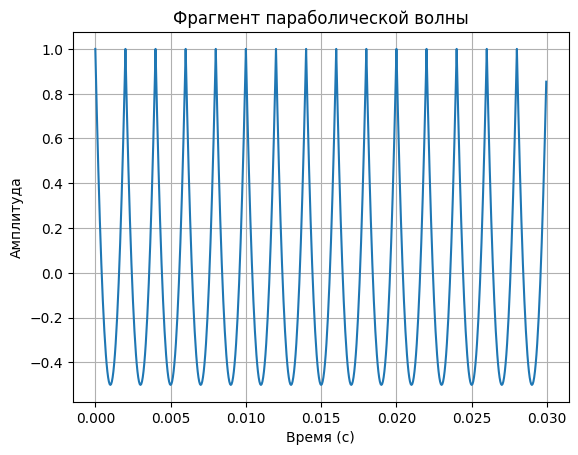

In [44]:
parabolic_audio.segment(duration=0.03).plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Фрагмент параболической волны")
plt.grid(True)
plt.show()

**Общий вывод по Лабораторной работе №2**

Вторая лабораторная работа была посвящена углубленному изучению спектров периодических сигналов и связанных с ними явлений. Основные аспекты, рассмотренные в ходе работы, включают:

1.  **Спектральный анализ различных форм волн:** Были проанализированы и сопоставлены спектры стандартных сигналов (пилообразного, прямоугольного, треугольного), что позволило выявить зависимость гармонического состава от формы сигнала во временной области.
2.  **Алиасинг:** Наглядно продемонстрирован эффект "заворачивания" спектра (алиасинг) при недостаточной частоте дискретизации и обсуждено его влияние на воспринимаемое звучание.
3.  **Роль DC-компоненты:** Исследовано значение и влияние нулевой частотной компоненты (`hs[0]`) на сигнал.
4.  **Модификация спектра для фильтрации и синтеза:** Освоены приемы прямого изменения спектра для достижения желаемых характеристик сигнала, в частности, для реализации фильтрации (например, 1/f) и синтеза сигналов с определенным законом убывания гармоник (например, 1/f² для получения параболической формы).

Выполненные упражнения способствовали лучшему пониманию связи между временным и частотным представлением сигналов, а также практических аспектов цифровой обработки, таких как выбор частоты дискретизации и методы формирования сигналов с заданными свойствами.